In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [53]:
df = pd.read_parquet('../zippedData/merged_data.parquet')
df["release_date"] = df["release_date"].apply(pd.to_datetime)
df

,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date
0,10 000 b c,156.253027,164065678,105000000,94784201,269065678,[None],[None],[None],NaN,2008-03-07
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Sci-Fi, Mystery, Drama, Horror, Thriller]",[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
2,10 days in a madhouse,-99.878200,-11985384,12000000,14616,14616,"[Drama, None]",[Timothy Hines],[Timothy Hines],111.0,2015-11-11
3,10 things i hate about you,364.722692,47413950,13000000,38177966,60413950,[None],[None],[None],NaN,1999-03-31
4,102 dalmatians,-21.245225,-18058441,85000000,66941559,66941559,[None],[None],[None],NaN,2000-11-22
...,...,...,...,...,...,...,...,...,...,...,...
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,"[Adventure, Family, Comedy, Animation]","[Rich Moore, Jared Bush, Byron Howard]","[Jared Bush, Jennifer Lee, Jim Reardon, Kellie...",108.0,2016-03-04
5694,zulu,-88.473575,-14155772,16000000,0,1844228,"[Thriller, Drama, Crime, None]",[Jérôme Salle],"[Jérôme Salle, Julien Rappeneau, Caryl Ferey]",110.0,2013-12-31
5695,zwartboek,23.810700,5238354,22000000,4398532,27238354,[None],[None],[None],NaN,2007-04-06
5696,ã l intã rieur,-70.135600,-2104068,3000000,0,895932,[None],[None],[None],NaN,2008-04-15


In [54]:
test = df.explode('genres')
test
# movie_info_df["genres"] = movie_info_df["genres"].str.split(pat = "|")
# movie_info_df = movie_info_df.explode("genres")
# movie_info_df

#test["ROI"].median()

,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date
0,10 000 b c,156.253027,164065678,105000000,94784201,269065678,None,[None],[None],NaN,2008-03-07
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Sci-Fi,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Mystery,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Drama,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Horror,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
...,...,...,...,...,...,...,...,...,...,...,...
5694,zulu,-88.473575,-14155772,16000000,0,1844228,Crime,[Jérôme Salle],"[Jérôme Salle, Julien Rappeneau, Caryl Ferey]",110.0,2013-12-31
5694,zulu,-88.473575,-14155772,16000000,0,1844228,None,[Jérôme Salle],"[Jérôme Salle, Julien Rappeneau, Caryl Ferey]",110.0,2013-12-31
5695,zwartboek,23.810700,5238354,22000000,4398532,27238354,None,[None],[None],NaN,2007-04-06
5696,ã l intã rieur,-70.135600,-2104068,3000000,0,895932,None,[None],[None],NaN,2008-04-15


In [55]:
grouped_median_by_genre = test.groupby(["genres"]).median().sort_values("ROI", ascending = False).reset_index()
grouped_median_by_genre

,genres,ROI,profit,prod_budget,dom_gross,world_gross,runtime_min
0,Animation,187.687655,161900902.0,80000000.0,103412758.0,274392649.0,95.0
1,Mystery,172.828467,33359310.0,15000000.0,25514517.0,44567606.0,103.5
2,Sci-Fi,146.732013,86856088.0,61000000.0,59874525.0,155564919.0,112.0
3,Adventure,145.261623,115109838.5,90000000.0,71564221.5,210600210.5,107.0
4,Family,138.674683,73029117.5,60000000.0,66070876.0,136559299.5,99.0
5,Horror,135.800588,20768449.0,7500000.0,18494006.0,38359310.0,94.0
6,Fantasy,133.311758,77598620.5,80000000.0,55689394.0,147080165.5,106.5
7,Comedy,130.756255,29119358.0,25000000.0,34296320.0,59596747.0,101.0
8,Romance,123.940929,16881360.0,18000000.0,22494190.5,41781112.5,105.0
9,Action,116.566082,53099364.0,50000000.0,44923017.5,115419805.5,110.0


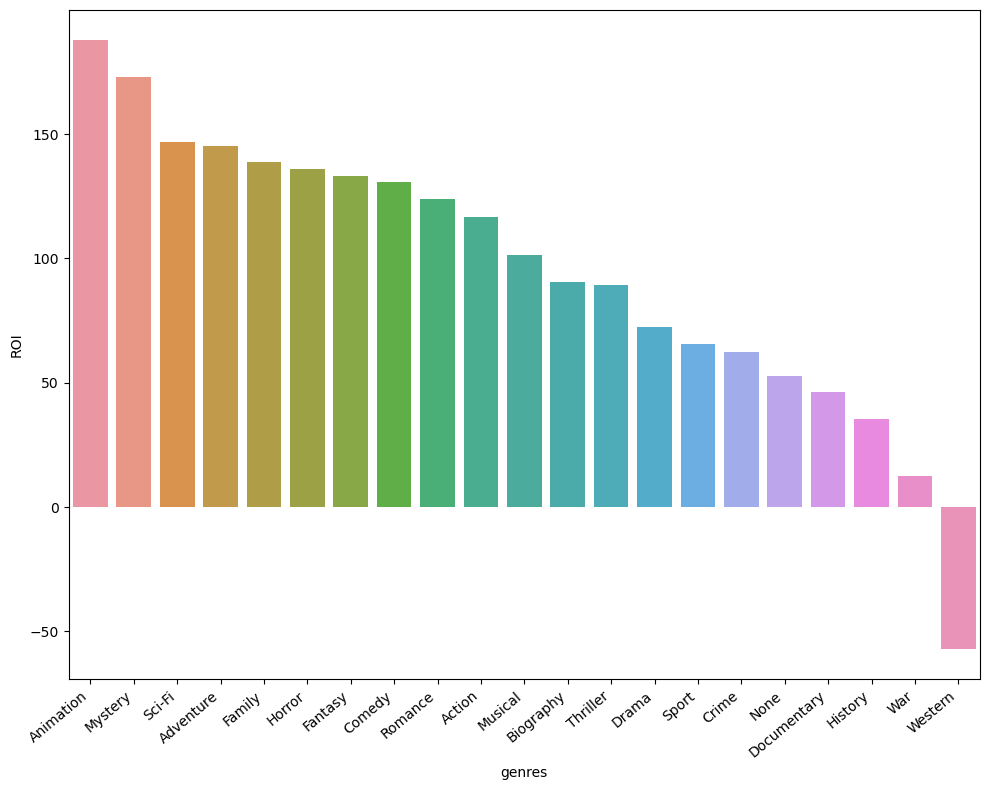

In [69]:
fig = plt.figure(figsize = (10, 8))
ax = sns.barplot(x = grouped_median_by_genre["genres"], y = grouped_median_by_genre["ROI"], estimator = np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show();

In [64]:
test1 = df.explode("director")
test1

,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date
0,10 000 b c,156.253027,164065678,105000000,94784201,269065678,[None],None,[None],NaN,2008-03-07
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Sci-Fi, Mystery, Drama, Horror, Thriller]",Dan Trachtenberg,"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
2,10 days in a madhouse,-99.878200,-11985384,12000000,14616,14616,"[Drama, None]",Timothy Hines,[Timothy Hines],111.0,2015-11-11
3,10 things i hate about you,364.722692,47413950,13000000,38177966,60413950,[None],None,[None],NaN,1999-03-31
4,102 dalmatians,-21.245225,-18058441,85000000,66941559,66941559,[None],None,[None],NaN,2000-11-22
...,...,...,...,...,...,...,...,...,...,...,...
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,"[Adventure, Family, Comedy, Animation]",Byron Howard,"[Jared Bush, Jennifer Lee, Jim Reardon, Kellie...",108.0,2016-03-04
5694,zulu,-88.473575,-14155772,16000000,0,1844228,"[Thriller, Drama, Crime, None]",Jérôme Salle,"[Jérôme Salle, Julien Rappeneau, Caryl Ferey]",110.0,2013-12-31
5695,zwartboek,23.810700,5238354,22000000,4398532,27238354,[None],None,[None],NaN,2007-04-06
5696,ã l intã rieur,-70.135600,-2104068,3000000,0,895932,[None],None,[None],NaN,2008-04-15


In [65]:
grouped_median_by_director = test1.groupby(["director"]).median().sort_values("ROI", ascending = False).reset_index().head(25)
grouped_median_by_director

,director,ROI,profit,prod_budget,dom_gross,world_gross,runtime_min
0,Chris Lofing,41556.474000,41556474.0,100000.0,22764410.0,41656474.0,81.0
1,Travis Cluff,41556.474000,41556474.0,100000.0,22764410.0,41656474.0,81.0
2,Tod Williams,5817.067733,174512032.0,3000000.0,84752907.0,177512032.0,91.0
3,William Brent Bell,5329.079260,79490221.0,5500000.0,44541250.5,84990221.0,90.0
4,Bradley Parker,4141.172100,41411721.0,1000000.0,18119640.0,42411721.0,86.0
5,Jordan Peele,3089.205285,242289130.5,12500000.0,175523797.5,254789130.5,110.0
6,Nitesh Tiwari,3001.627558,285154618.0,9500000.0,12391761.0,294654618.0,161.0
7,Henry Joost,2756.359840,137817992.0,5000000.0,53900335.0,142817992.0,88.0
8,Ariel Schulman,2756.359840,137817992.0,5000000.0,53900335.0,142817992.0,88.0
9,Josh Boone,2459.723617,295166834.0,12000000.0,124872350.0,307166834.0,126.0


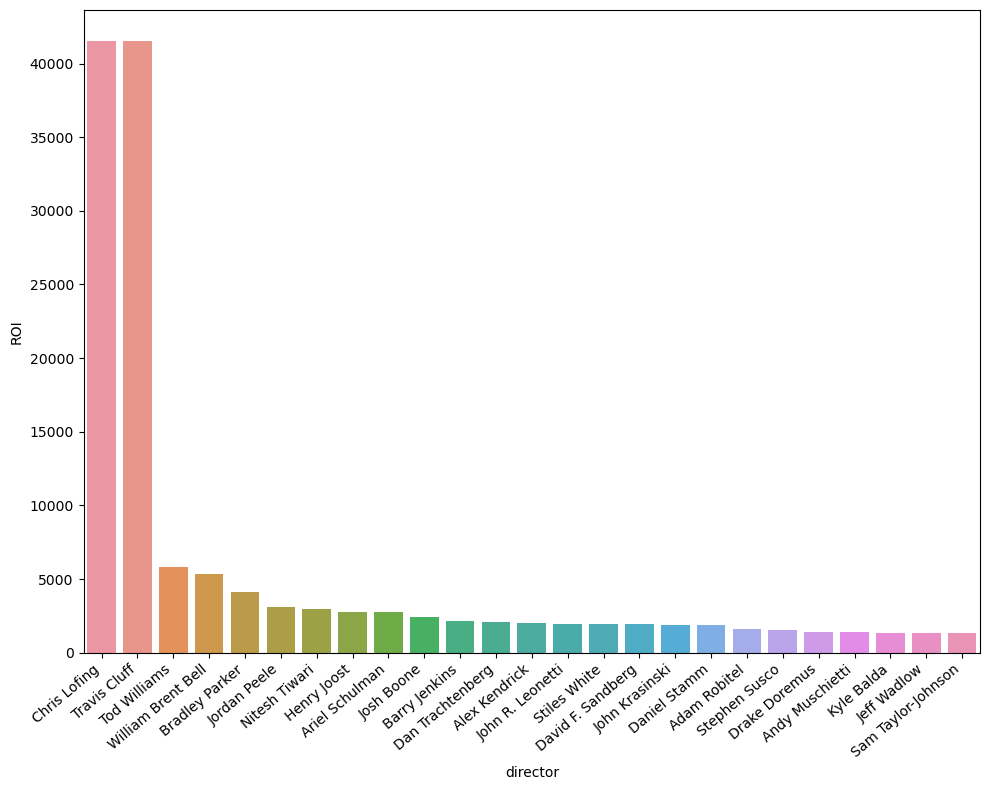

In [67]:
fig = plt.figure(figsize = (10, 8))
ax = sns.barplot(x = grouped_median_by_director["director"], y = grouped_median_by_director["ROI"], estimator = np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show();

In [9]:
test2 = df.explode("writer")
test2

,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date
0,10 000 b c,156.253027,164065678,105000000,94784201,269065678,[None],[None],None,NaN,2008-03-07
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Sci-Fi, Mystery, Drama, Horror, Thriller]",[Dan Trachtenberg],Matthew Stuecken,103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Sci-Fi, Mystery, Drama, Horror, Thriller]",[Dan Trachtenberg],Josh Campbell,103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Sci-Fi, Mystery, Drama, Horror, Thriller]",[Dan Trachtenberg],Damien Chazelle,103.0,2016-03-11
2,10 days in a madhouse,-99.878200,-11985384,12000000,14616,14616,"[Drama, None]",[Timothy Hines],Timothy Hines,111.0,2015-11-11
...,...,...,...,...,...,...,...,...,...,...,...
5694,zulu,-88.473575,-14155772,16000000,0,1844228,"[Thriller, Drama, Crime, None]",[Jérôme Salle],Julien Rappeneau,110.0,2013-12-31
5694,zulu,-88.473575,-14155772,16000000,0,1844228,"[Thriller, Drama, Crime, None]",[Jérôme Salle],Caryl Ferey,110.0,2013-12-31
5695,zwartboek,23.810700,5238354,22000000,4398532,27238354,[None],[None],None,NaN,2007-04-06
5696,ã l intã rieur,-70.135600,-2104068,3000000,0,895932,[None],[None],None,NaN,2008-04-15


In [10]:
grouped_median_by_writer = test2.groupby(["writer"]).median().sort_values("ROI", ascending = False).reset_index().head(25)
grouped_median_by_writer

,writer,ROI,profit,prod_budget,dom_gross,world_gross,runtime_min
0,Chris Lofing,41556.474000,41556474.0,100000.0,22764410.0,41656474.0,81.0
1,Travis Cluff,41556.474000,41556474.0,100000.0,22764410.0,41656474.0,81.0
2,Matthew Peterman,10075.949000,100759490.0,1000000.0,53262945.0,101759490.0,83.0
3,William Brent Bell,10075.949000,100759490.0,1000000.0,53262945.0,101759490.0,83.0
4,Michael R. Perry,5817.067733,174512032.0,3000000.0,84752907.0,177512032.0,91.0
5,Tom Pabst,5817.067733,174512032.0,3000000.0,84752907.0,177512032.0,91.0
6,Tarell Alvin McCraney,4249.700800,63745512.0,1500000.0,27854931.0,65245512.0,111.0
7,Shane Van Dyke,4141.172100,41411721.0,1000000.0,18119640.0,42411721.0,86.0
8,Carey Van Dyke,4141.172100,41411721.0,1000000.0,18119640.0,42411721.0,86.0
9,Piyush Gupta,3001.627558,285154618.0,9500000.0,12391761.0,294654618.0,161.0


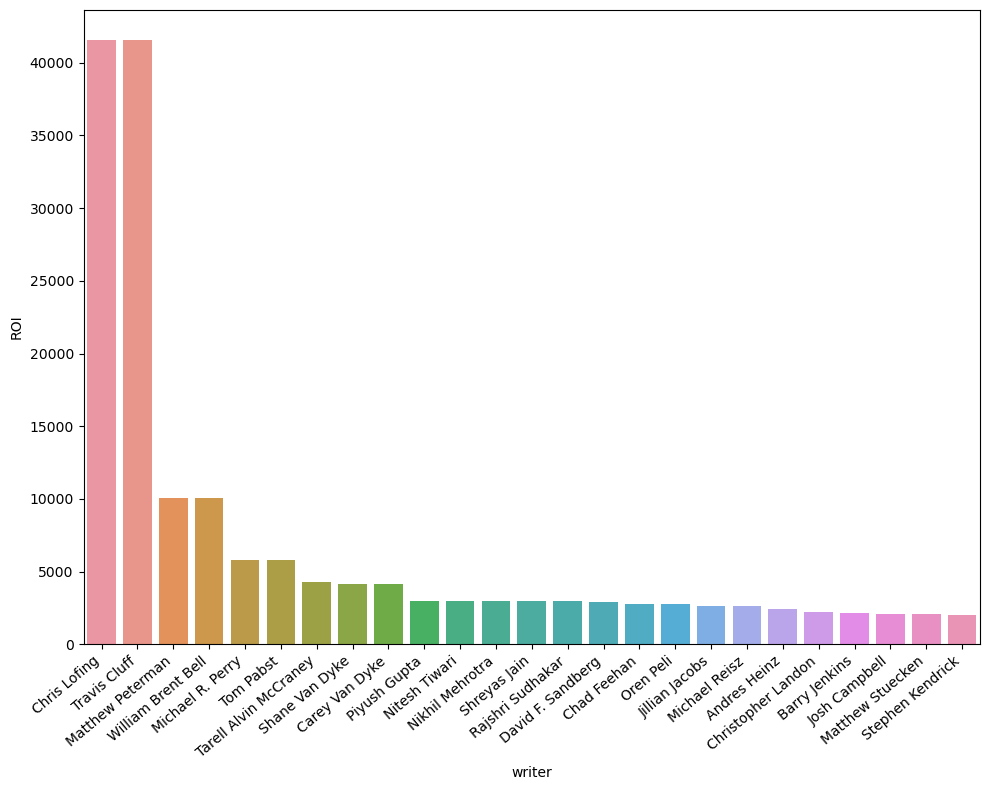

In [70]:
fig = plt.figure(figsize = (10, 8))
ax = sns.barplot(x = grouped_median_by_writer["writer"], y = grouped_median_by_writer["ROI"], estimator = np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show();

In [12]:
filtered_df_by_date = df.loc[df["release_date"] >= "2012-11-14"]
filtered_df_by_date

,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Sci-Fi, Mystery, Drama, Horror, Thriller]",[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
2,10 days in a madhouse,-99.878200,-11985384,12000000,14616,14616,"[Drama, None]",[Timothy Hines],[Timothy Hines],111.0,2015-11-11
10,12 strong,103.195366,36118378,35000000,45819713,71118378,"[War, History, Action, Drama]",[Nicolai Fuglsig],"[Ted Tally, Peter Craig, Doug Stanton]",130.0,2018-01-19
11,12 years a slave,805.126715,161025343,20000000,56671993,181025343,"[Drama, History, None, Biography]",[Steve McQueen],"[John Ridley, Solomon Northup]",134.0,2013-10-18
14,13 hours the secret soldiers of benghazi,38.822740,19411370,50000000,52853219,69411370,"[War, History, Action, None, Drama, Thriller]",[None],[None],NaN,2016-01-15
...,...,...,...,...,...,...,...,...,...,...,...
5684,zipper,-100.000000,-4500000,4500000,0,0,"[Thriller, Drama]",[Mora Stephens],"[Joel Viertel, Mora Stephens]",112.0,2015-08-28
5686,zombie hunter,-100.000000,-1000000,1000000,0,0,"[Action, None, Comedy, Horror]",[K. King],"[Kurt Knight, K. King]",93.0,2013-10-08
5691,zoolander 2,10.697386,5348693,50000000,28848693,55348693,[Comedy],[Ben Stiller],"[Justin Theroux, John Hamburg, Ben Stiller, Ni...",101.0,2016-02-12
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,"[Adventure, Family, Comedy, Animation]","[Rich Moore, Jared Bush, Byron Howard]","[Jared Bush, Jennifer Lee, Jim Reardon, Kellie...",108.0,2016-03-04


In [13]:
test_filtered_date = filtered_df_by_date.explode("genres")
test_filtered_date

,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Sci-Fi,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Mystery,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Drama,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Horror,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Thriller,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
...,...,...,...,...,...,...,...,...,...,...,...
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,Animation,"[Rich Moore, Jared Bush, Byron Howard]","[Jared Bush, Jennifer Lee, Jim Reardon, Kellie...",108.0,2016-03-04
5694,zulu,-88.473575,-14155772,16000000,0,1844228,Thriller,[Jérôme Salle],"[Jérôme Salle, Julien Rappeneau, Caryl Ferey]",110.0,2013-12-31
5694,zulu,-88.473575,-14155772,16000000,0,1844228,Drama,[Jérôme Salle],"[Jérôme Salle, Julien Rappeneau, Caryl Ferey]",110.0,2013-12-31
5694,zulu,-88.473575,-14155772,16000000,0,1844228,Crime,[Jérôme Salle],"[Jérôme Salle, Julien Rappeneau, Caryl Ferey]",110.0,2013-12-31


In [19]:
grouped_by_genre_filtered = test_filtered_date.groupby(["genres"]).median().sort_values("ROI", ascending = False).reset_index()
grouped_by_genre_filtered

,genres,ROI,profit,prod_budget,dom_gross,world_gross,runtime_min
0,Mystery,193.188727,30749230.0,10000000.0,25138705.0,42785387.0,105.0
1,Animation,187.454112,151494094.0,75000000.0,85988250.0,256443025.5,95.0
2,Horror,173.720304,18586857.5,6250000.0,17374077.0,30946408.0,94.0
3,Fantasy,167.114096,96861183.0,90000000.0,58250803.0,197504758.0,109.5
4,Comedy,164.101535,35401336.5,25000000.0,35340716.5,62657119.0,102.0
5,Family,163.067059,88747086.5,62500000.0,71885436.0,164599611.5,98.5
6,Adventure,161.933473,128314513.0,95000000.0,72679278.0,216562312.0,109.0
7,Sci-Fi,145.898193,108514727.0,97000000.0,61737191.0,203127894.0,114.0
8,Romance,133.868173,16881360.0,15000000.0,23303641.5,41748034.5,106.0
9,Action,119.568527,54834520.0,58000000.0,45052363.5,122670512.5,113.0


In [25]:
fig = px.bar(grouped_by_genre_filtered, x = "genres", y = "ROI", color_discrete_sequence = ["pink"])
fig.show();

In [21]:
test1_filtered_date = filtered_df_by_date.explode("director")
test1_filtered_date

,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Sci-Fi, Mystery, Drama, Horror, Thriller]",Dan Trachtenberg,"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
2,10 days in a madhouse,-99.878200,-11985384,12000000,14616,14616,"[Drama, None]",Timothy Hines,[Timothy Hines],111.0,2015-11-11
10,12 strong,103.195366,36118378,35000000,45819713,71118378,"[War, History, Action, Drama]",Nicolai Fuglsig,"[Ted Tally, Peter Craig, Doug Stanton]",130.0,2018-01-19
11,12 years a slave,805.126715,161025343,20000000,56671993,181025343,"[Drama, History, None, Biography]",Steve McQueen,"[John Ridley, Solomon Northup]",134.0,2013-10-18
14,13 hours the secret soldiers of benghazi,38.822740,19411370,50000000,52853219,69411370,"[War, History, Action, None, Drama, Thriller]",None,[None],NaN,2016-01-15
...,...,...,...,...,...,...,...,...,...,...,...
5691,zoolander 2,10.697386,5348693,50000000,28848693,55348693,[Comedy],Ben Stiller,"[Justin Theroux, John Hamburg, Ben Stiller, Ni...",101.0,2016-02-12
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,"[Adventure, Family, Comedy, Animation]",Rich Moore,"[Jared Bush, Jennifer Lee, Jim Reardon, Kellie...",108.0,2016-03-04
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,"[Adventure, Family, Comedy, Animation]",Jared Bush,"[Jared Bush, Jennifer Lee, Jim Reardon, Kellie...",108.0,2016-03-04
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,"[Adventure, Family, Comedy, Animation]",Byron Howard,"[Jared Bush, Jennifer Lee, Jim Reardon, Kellie...",108.0,2016-03-04


In [23]:
grouped_by_director_filtered = test1_filtered_date.groupby(["director"]).median().sort_values("ROI", ascending = False).reset_index().head(25)
grouped_by_director_filtered

,director,ROI,profit,prod_budget,dom_gross,world_gross,runtime_min
0,Chris Lofing,41556.474000,41556474.0,100000.0,22764410.0,41656474.0,81.0
1,Travis Cluff,41556.474000,41556474.0,100000.0,22764410.0,41656474.0,81.0
2,Jordan Peele,3089.205285,242289130.5,12500000.0,175523797.5,254789130.5,110.0
3,Nitesh Tiwari,3001.627558,285154618.0,9500000.0,12391761.0,294654618.0,161.0
4,Josh Boone,2459.723617,295166834.0,12000000.0,124872350.0,307166834.0,126.0
5,Alex Kendrick,2365.841300,70975239.0,3000000.0,67790117.0,73975239.0,120.0
6,Barry Jenkins,2157.596929,35802339.5,6750000.0,21385352.0,42552339.5,115.0
7,Dan Trachtenberg,2065.728440,103286422.0,5000000.0,72082999.0,108286422.0,103.0
8,John R. Leonetti,1973.690886,130920132.5,9250000.0,49287659.0,140170132.5,94.5
9,Stiles White,1966.012640,98300632.0,5000000.0,50856010.0,103300632.0,89.0


In [24]:
fig = px.bar(grouped_by_director_filtered, x = "director", y = "ROI", color_discrete_sequence = ["pink"])
fig.show();

In [26]:
test2_filtered_date = filtered_df_by_date.explode("writer")
test2_filtered_date

,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Sci-Fi, Mystery, Drama, Horror, Thriller]",[Dan Trachtenberg],Matthew Stuecken,103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Sci-Fi, Mystery, Drama, Horror, Thriller]",[Dan Trachtenberg],Josh Campbell,103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Sci-Fi, Mystery, Drama, Horror, Thriller]",[Dan Trachtenberg],Damien Chazelle,103.0,2016-03-11
2,10 days in a madhouse,-99.878200,-11985384,12000000,14616,14616,"[Drama, None]",[Timothy Hines],Timothy Hines,111.0,2015-11-11
10,12 strong,103.195366,36118378,35000000,45819713,71118378,"[War, History, Action, Drama]",[Nicolai Fuglsig],Ted Tally,130.0,2018-01-19
...,...,...,...,...,...,...,...,...,...,...,...
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,"[Adventure, Family, Comedy, Animation]","[Rich Moore, Jared Bush, Byron Howard]",Byron Howard,108.0,2016-03-04
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,"[Adventure, Family, Comedy, Animation]","[Rich Moore, Jared Bush, Byron Howard]",Rich Moore,108.0,2016-03-04
5694,zulu,-88.473575,-14155772,16000000,0,1844228,"[Thriller, Drama, Crime, None]",[Jérôme Salle],Jérôme Salle,110.0,2013-12-31
5694,zulu,-88.473575,-14155772,16000000,0,1844228,"[Thriller, Drama, Crime, None]",[Jérôme Salle],Julien Rappeneau,110.0,2013-12-31
